In [1]:
#data loading
import pandas as pd
filename="/content/science.csv"
a=pd.read_csv(str(filename))
print(a)

      rownames State  PrivPub  school  class sex  like  Class
0            1   ACT   public       1      1   f     8    1.1
1            2   ACT   public       1      1   f     6    1.1
2            3   ACT   public       1      1   f     5    1.1
3            4   ACT   public       1      1   f     2    1.1
4            6   ACT   public       1      1   f     5    1.1
...        ...   ...      ...     ...    ...  ..   ...    ...
1380      1540   NSW  private      41      2   m     3   41.2
1381      1541   NSW  private      41      2   m     7   41.2
1382      1542   NSW  private      41      2   m     6   41.2
1383      1543   NSW  private      41      2   m     2   41.2
1384      1544   NSW  private      41      2   m     6   41.2

[1385 rows x 8 columns]


In [2]:
print(a.head())

   rownames State PrivPub  school  class sex  like  Class
0         1   ACT  public       1      1   f     8    1.1
1         2   ACT  public       1      1   f     6    1.1
2         3   ACT  public       1      1   f     5    1.1
3         4   ACT  public       1      1   f     2    1.1
4         6   ACT  public       1      1   f     5    1.1


In [3]:
print(a.tail())

      rownames State  PrivPub  school  class sex  like  Class
1380      1540   NSW  private      41      2   m     3   41.2
1381      1541   NSW  private      41      2   m     7   41.2
1382      1542   NSW  private      41      2   m     6   41.2
1383      1543   NSW  private      41      2   m     2   41.2
1384      1544   NSW  private      41      2   m     6   41.2


In [4]:

##Checking for null values
a.isna().sum()

,0
rownames,0
State,0
PrivPub,0
school,0
class,0
sex,2
like,0
Class,0


In [5]:
a["sex"]=a["sex"].fillna(a["sex"].mode()[0])

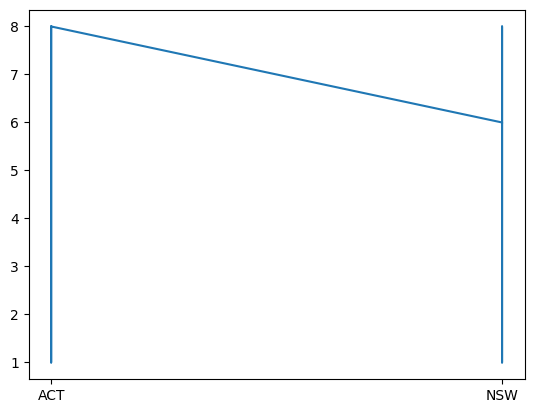

In [7]:
from matplotlib import pyplot as plt
#plt.plot(a["Country"],a["Placement Rate"])
#plt.plot(a[a.columns[1]],a[a.columns[10]])
target="like"

plt.plot(a[a.columns[1]],a[str(target)])
#print(a[a.columns[1]])

<BarContainer object of 1385 artists>

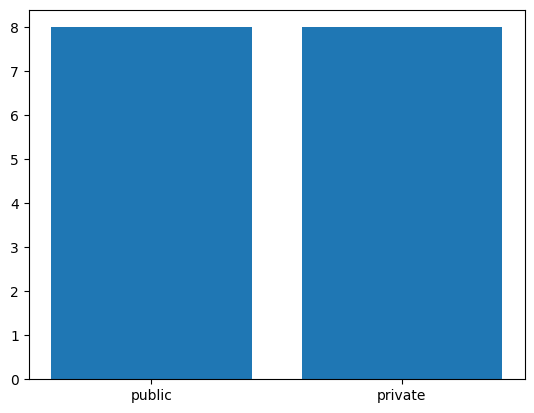

In [8]:
plt.bar(a[a.columns[2]],a[str(target)])

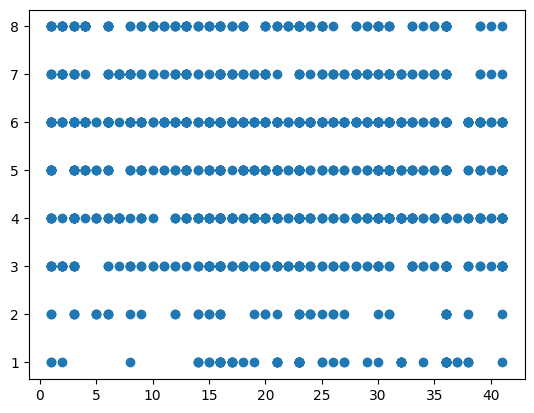

In [9]:
plt.scatter(a[a.columns[3]], a[str(target)])

In [11]:
from sklearn.preprocessing import LabelEncoder
#import numpy as np
b=LabelEncoder()


#transform string into int
transformColumns={1,2,5}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

      rownames  State  PrivPub  school  class  sex  like  Class
0            1      0        1       0      0    0     7      0
1            2      0        1       0      0    0     5      0
2            3      0        1       0      0    0     4      0
3            4      0        1       0      0    0     1      0
4            6      0        1       0      0    0     4      0
...        ...    ...      ...     ...    ...  ...   ...    ...
1380      1540      1        0      40      1    1     2     65
1381      1541      1        0      40      1    1     6     65
1382      1542      1        0      40      1    1     5     65
1383      1543      1        0      40      1    1     1     65
1384      1544      1        0      40      1    1     5     65

[1385 rows x 8 columns]


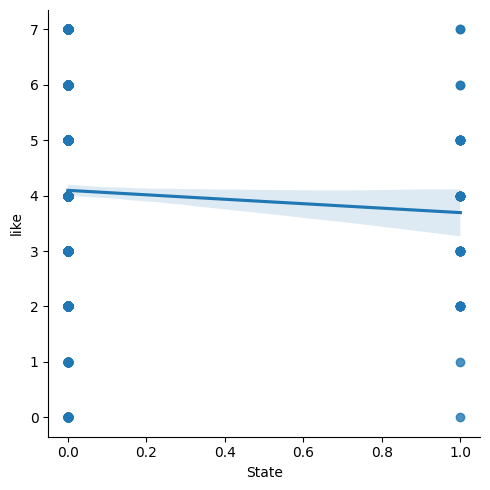

In [12]:
import seaborn as sns

sns.lmplot(x=a.columns[1],y=str(target),data=a)

<Axes: xlabel='PrivPub', ylabel='like'>

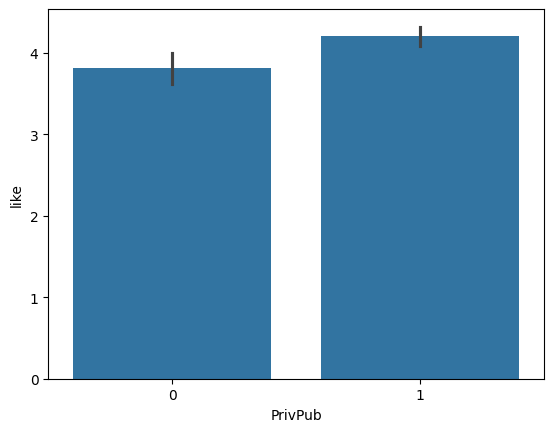

In [13]:
sns.barplot(x=a.columns[2],y=str(target),data=a)

<Axes: xlabel='school', ylabel='like'>

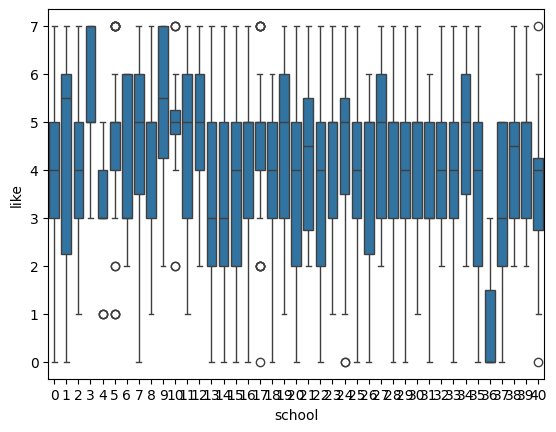

In [14]:
sns.boxplot(x=a.columns[3],y=str(target),data=a)

<ipython-input-15-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='like', ylabel='Density'>

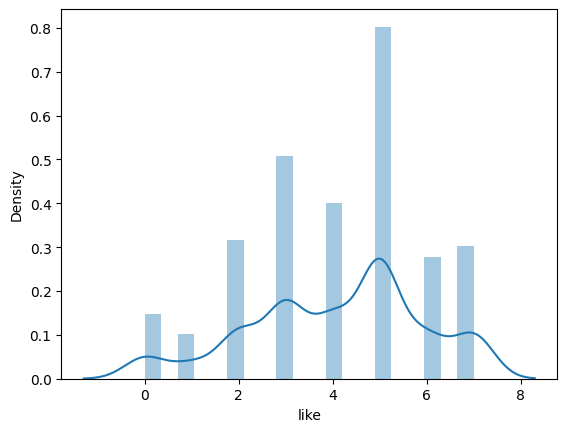

In [15]:
sns.distplot(a[str(target)])

<Axes: xlabel='PrivPub', ylabel='Density'>

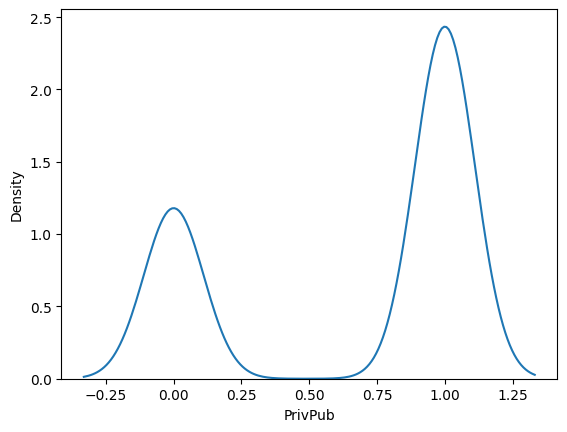

In [16]:
sns.kdeplot(a[a.columns[2]])

<Axes: xlabel='State', ylabel='count'>

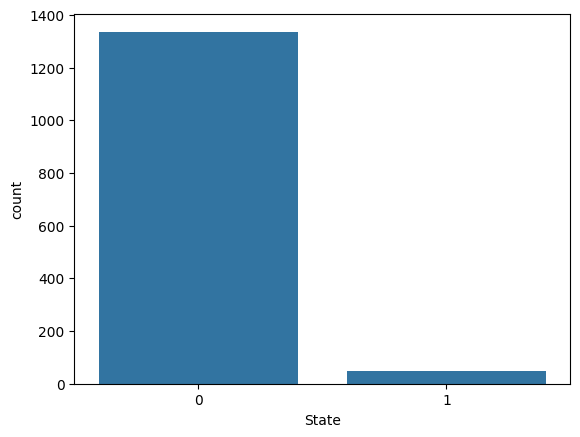

In [17]:
sns.countplot(x=a.columns[1],data=a)

<Axes: >

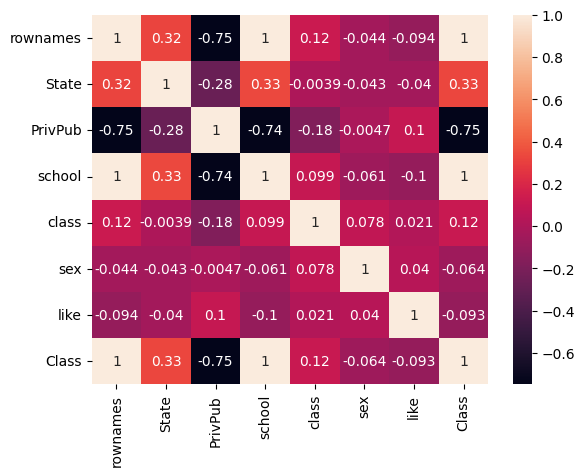

In [18]:
data=a.corr()
sns.heatmap(data, annot=True)

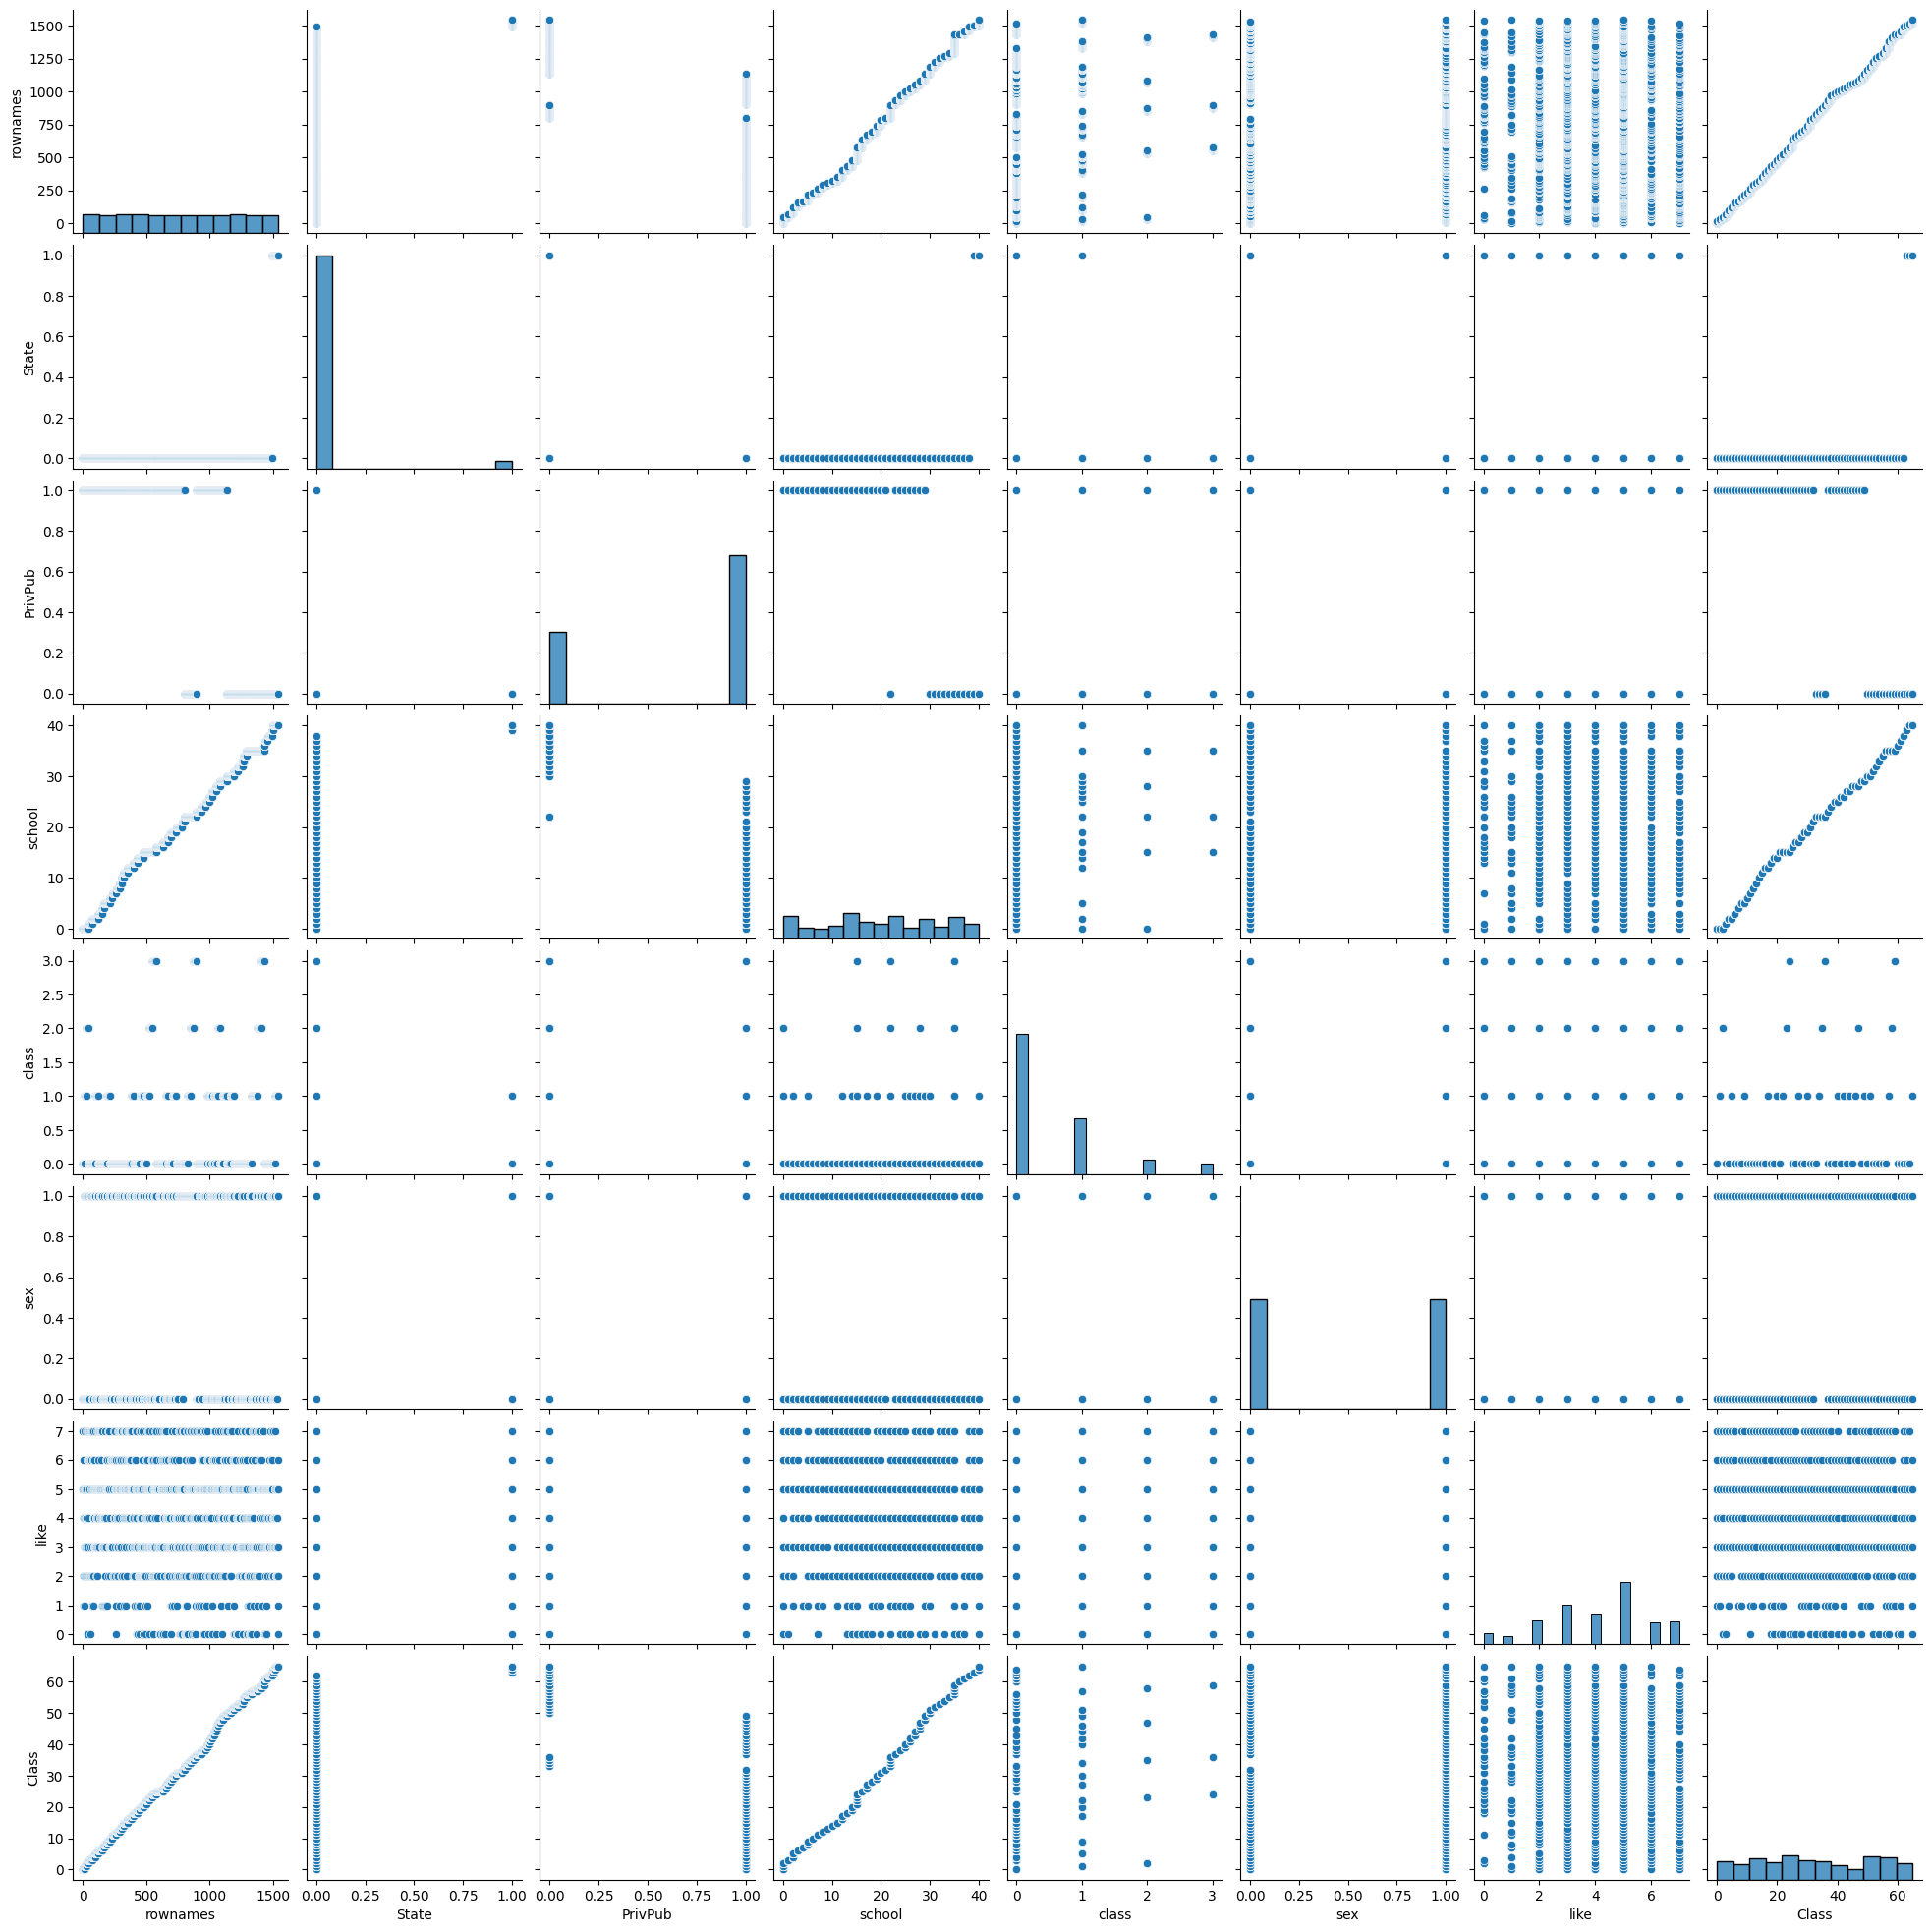

In [19]:
sns.pairplot(data=a)

In [20]:
#data split
y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

      rownames  State  PrivPub  school  class  sex  Class
0            1      0        1       0      0    0      0
1            2      0        1       0      0    0      0
2            3      0        1       0      0    0      0
3            4      0        1       0      0    0      0
4            6      0        1       0      0    0      0
...        ...    ...      ...     ...    ...  ...    ...
1380      1540      1        0      40      1    1     65
1381      1541      1        0      40      1    1     65
1382      1542      1        0      40      1    1     65
1383      1543      1        0      40      1    1     65
1384      1544      1        0      40      1    1     65

[1385 rows x 7 columns]


In [21]:
print(y)

0       7
1       5
2       4
3       1
4       4
       ..
1380    2
1381    6
1382    5
1383    1
1384    5
Name: like, Length: 1385, dtype: int64


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
print(x_train)

      rownames  State  PrivPub  school  class  sex  Class
395        437      0        1      14      0    0     19
1267      1413      0        0      35      3    0     59
323        354      0        1      12      0    0     16
141        153      0        1       3      0    1      6
1238      1376      0        0      35      1    1     57
...        ...    ...      ...     ...    ...  ...    ...
168        183      0        1       5      0    0      8
679        747      0        1      20      0    0     31
1045      1164      0        0      30      0    1     50
821        907      0        1      23      0    0     37
571        628      0        1      16      0    1     25

[1108 rows x 7 columns]


In [24]:
print(y_train)

395     2
1267    5
323     4
141     5
1238    7
       ..
168     5
679     3
1045    6
821     3
571     0
Name: like, Length: 1108, dtype: int64


In [25]:
print(x_test)

      rownames  State  PrivPub  school  class  sex  Class
1300      1451      0        0      37      0    1     61
215        233      0        1       6      0    1     10
1334      1491      0        0      38      0    1     62
206        223      0        1       6      0    1     10
645        709      0        1      19      0    1     29
...        ...    ...      ...     ...    ...  ...    ...
743        822      0        0      22      0    1     33
1244      1382      0        0      35      2    0     58
18          20      0        1       0      1    0      1
1263      1409      0        0      35      3    0     59
203        220      0        1       6      0    0     10

[277 rows x 7 columns]


In [26]:
print(y_test)

1300    4
215     6
1334    2
206     6
645     4
       ..
743     1
1244    6
18      2
1263    5
203     3
Name: like, Length: 277, dtype: int64


In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [28]:
print(ypred)

[3.85260909 4.45981496 3.76551085 4.46781943 4.08470708 3.83562321
 4.10554345 3.92582063 4.11928642 3.91104657 3.93062332 4.16905421
 3.90944568 3.62827882 4.12969224 4.11153019 4.4842953  4.4112983
 4.04489381 3.61967253 3.96210816 3.9950245  4.31203324 4.48799072
 4.23614127 3.9649996  4.08560906 4.21187064 4.15019324 3.93000695
 4.15056245 3.75096016 4.22325263 4.46196806 4.02952705 4.07787226
 4.23918947 4.23475477 4.34235782 3.91062674 4.11990855 3.70665361
 4.1083284  4.02114868 4.17679101 4.15579637 3.91024612 4.4659703
 3.98071708 4.54186227 4.22645442 4.24665329 4.08809188 4.55395046
 4.03513018 3.83757972 4.22227645 3.98740064 3.88182212 4.6242393
 4.12008687 4.092285   4.47069619 4.19681069 4.00838386 4.41527803
 3.98311842 4.0947208  4.14896155 3.8654384  4.67403183 3.69456542
 4.11430542 4.09388589 3.78574738 4.10912885 4.10586848 4.01398699
 3.83434266 4.02990766 4.34421124 4.39112701 4.35606905 3.99512603
 4.02203061 4.23373992 4.02603285 4.0287266  3.93565134 3.9943255

In [30]:
print(model.predict([[1451,0,0,37,0,1,61]]))

[3.85260909]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [32]:
print(ypred)

[3. 3. 3. 3. 3. 3. 5. 5. 5. 0. 5. 5. 2. 4. 5. 3. 7. 3. 7. 1. 3. 0. 5. 5.
 5. 5. 5. 3. 0. 4. 5. 7. 5. 6. 1. 5. 3. 4. 7. 5. 7. 0. 5. 2. 7. 3. 0. 4.
 5. 6. 4. 4. 7. 5. 6. 2. 4. 2. 5. 6. 7. 4. 2. 5. 5. 5. 7. 2. 5. 7. 5. 3.
 5. 3. 6. 2. 5. 1. 3. 5. 3. 4. 4. 3. 7. 2. 5. 5. 5. 6. 5. 3. 0. 1. 3. 2.
 3. 4. 6. 7. 4. 5. 5. 4. 5. 4. 5. 6. 5. 4. 5. 3. 5. 2. 5. 5. 4. 4. 5. 5.
 7. 1. 7. 4. 5. 4. 5. 4. 3. 6. 5. 5. 4. 7. 5. 4. 2. 5. 7. 2. 0. 5. 7. 0.
 3. 7. 5. 5. 2. 1. 6. 4. 3. 2. 3. 3. 3. 7. 5. 2. 6. 5. 4. 3. 4. 5. 5. 4.
 2. 2. 0. 0. 4. 3. 4. 4. 0. 5. 7. 2. 2. 6. 6. 4. 5. 0. 4. 4. 7. 4. 5. 1.
 5. 7. 5. 5. 3. 5. 1. 5. 7. 6. 2. 4. 3. 7. 5. 2. 5. 7. 4. 5. 1. 7. 6. 3.
 1. 4. 5. 2. 2. 5. 5. 3. 4. 4. 3. 4. 5. 2. 4. 2. 5. 3. 6. 0. 7. 6. 5. 5.
 5. 4. 2. 2. 5. 4. 6. 4. 3. 0. 5. 3. 7. 2. 2. 5. 4. 5. 6. 3. 5. 5. 5. 1.
 3. 3. 2. 2. 5. 7. 3. 4. 5. 1. 3. 3. 3.]


In [34]:
print(model.predict([[1451,0,0,37,0,1,61]]))

[3.85260909]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
from sklearn.ensemble import RandomForestRegressor
b=RandomForestRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [36]:
print(ypred)

[2.7  4.08 4.14 4.49 2.69 4.15 4.52 4.6  5.08 0.21 4.66 4.99 1.47 2.52
 4.41 3.52 6.5  3.28 5.47 1.95 3.38 1.88 5.45 5.46 5.64 3.27 4.73 2.96
 1.48 4.66 5.4  5.9  4.85 4.73 2.03 5.06 4.   3.87 6.75 4.73 5.72 0.32
 3.65 3.05 5.76 3.35 0.37 3.98 5.02 6.12 4.05 3.89 6.33 4.56 4.97 2.06
 4.62 3.27 3.88 6.05 5.8  3.87 3.7  4.78 5.66 5.11 6.22 3.01 5.44 6.01
 5.31 3.61 4.71 3.25 5.18 3.   4.19 2.42 3.58 5.3  4.38 3.48 4.36 4.03
 5.72 3.69 4.94 4.07 5.28 4.75 4.94 3.42 1.83 2.42 4.65 3.08 3.38 3.37
 4.92 6.3  4.28 5.29 4.4  3.8  4.46 4.25 4.99 5.57 4.08 3.95 4.42 2.58
 5.2  3.11 4.29 5.03 3.67 4.53 4.41 4.35 6.75 1.27 6.67 4.51 5.06 3.64
 4.77 4.67 2.93 5.57 4.35 5.26 2.7  6.02 4.94 3.97 2.82 4.45 6.86 1.92
 1.23 4.46 6.7  1.37 3.52 5.37 4.72 4.52 2.63 2.35 5.46 3.82 3.01 3.57
 3.76 3.74 3.42 6.24 5.29 2.99 5.68 4.24 4.16 3.53 4.39 4.4  4.89 4.51
 3.18 1.35 1.05 0.63 3.78 3.69 4.06 4.36 5.6  4.7  6.74 2.38 3.49 5.51
 3.95 4.73 5.66 1.85 3.95 3.26 5.63 3.41 5.11 2.02 4.95 5.92 4.53 4.48
 3.09 

In [38]:
print(model.predict([[1451,0,0,37,0,1,61]]))

[3.85260909]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
